In [1]:
import pandas as pd

general_data = pd.read_csv("data/general_data.csv")
employee_data = pd.read_csv("data/employee_survey_data.csv")
manager_data = pd.read_csv("data/manager_survey_data.csv")
in_time_data = pd.read_csv("data/in_time.csv")
out_time_data = pd.read_csv("data/out_time.csv")

In [2]:
df = ( general_data
    .merge(employee_data, on="EmployeeID", how="left")
    .merge(manager_data,  on="EmployeeID", how="left")
)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

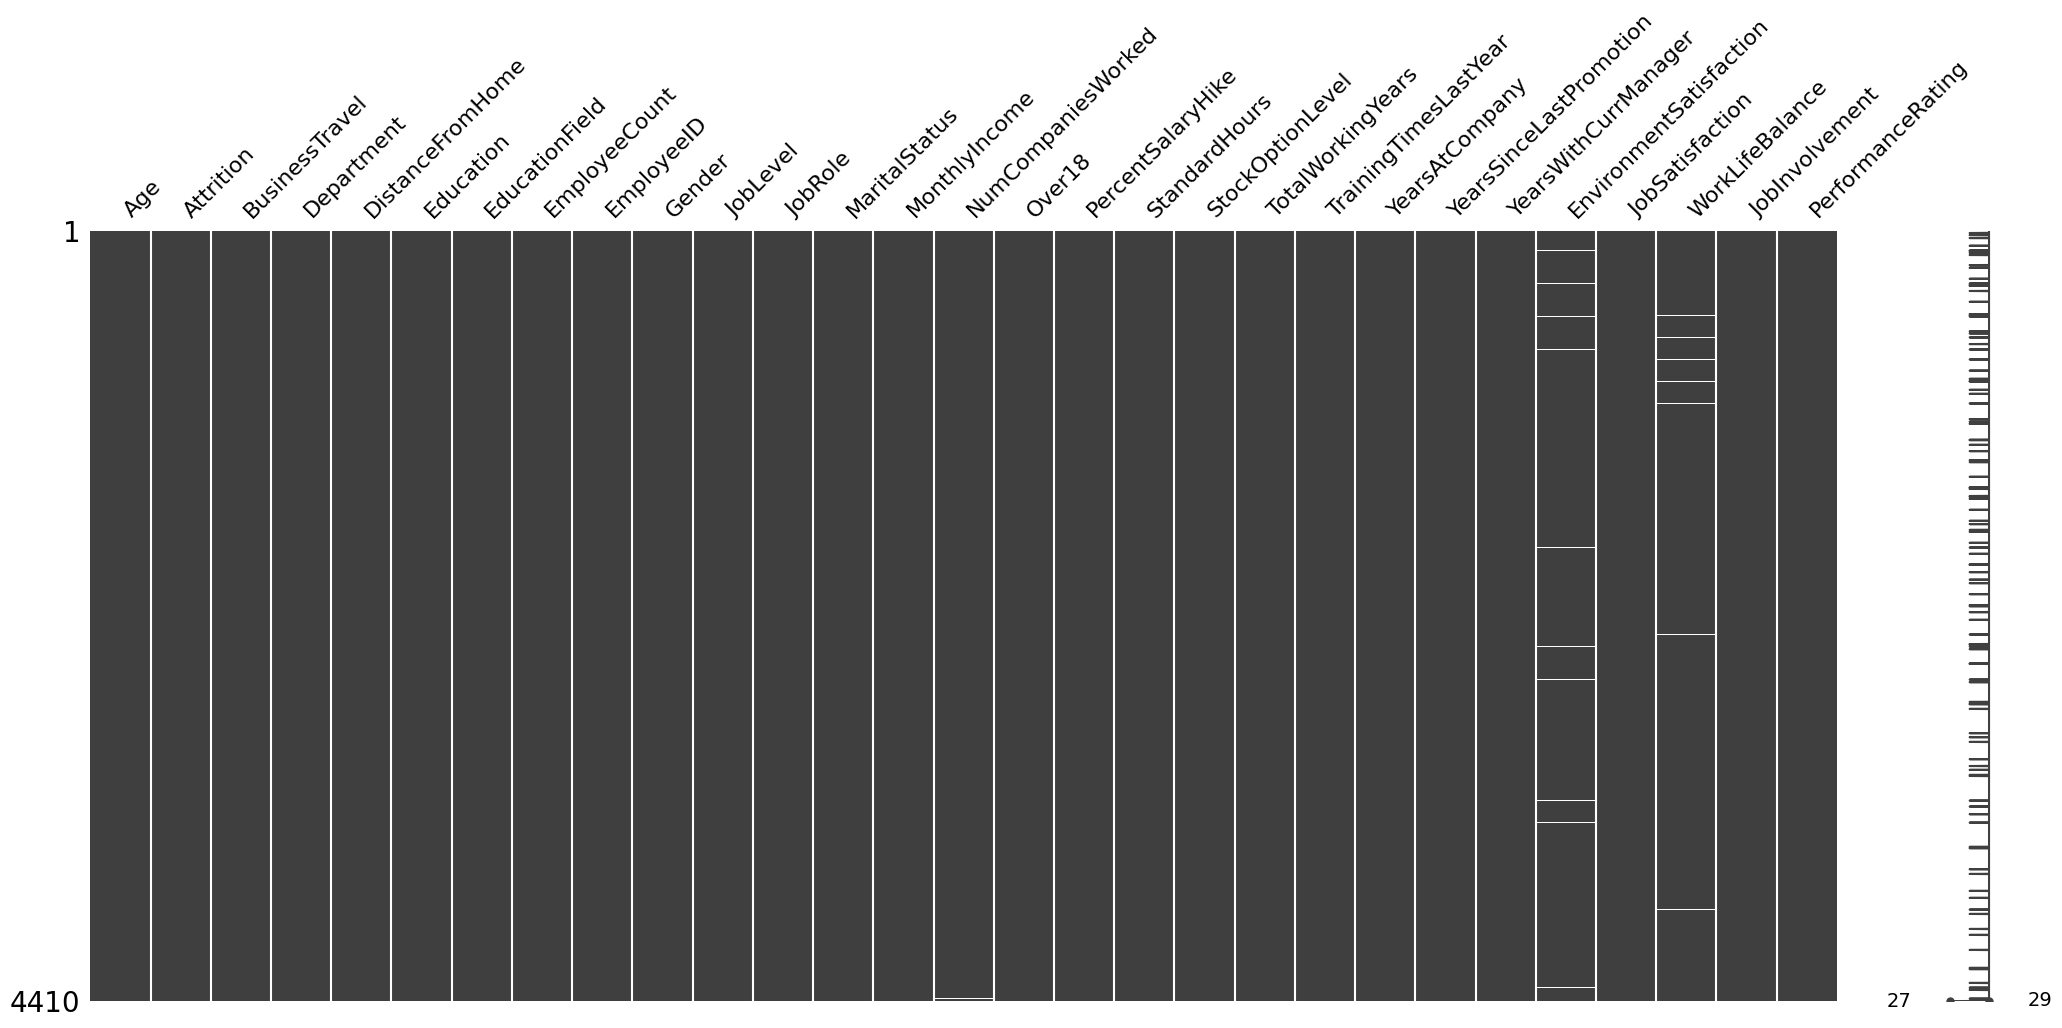

Missing values after preprocessing:
0


In [3]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Visualize missing data
msno.matrix(df)
plt.show()

# Identify column types
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values
# For numerical columns, use median imputation
if len(numerical_cols) > 0:
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())

# For categorical columns, use mode imputation
if len(categorical_cols) > 0:
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0]) # .mode() returns a Series, take the first mode

# One-Hot Encode categorical columns if any exist
if len(categorical_cols) > 0:
    # Create a ColumnTransformer to apply OneHotEncoder to categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
        ],
        remainder='passthrough' # Keep numerical columns as they are
    )

    # Apply the preprocessor
    df_encoded_array = preprocessor.fit_transform(df)

    # Get feature names for the new DataFrame
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    remaining_feature_names = [col for col in df.columns if col not in categorical_cols]
    all_feature_names = list(ohe_feature_names) + remaining_feature_names

    # Create a new DataFrame with encoded features
    df = pd.DataFrame(df_encoded_array, columns=all_feature_names, index=df.index)

# Verify that there are no more missing values
print("Missing values after preprocessing:")
print(df.isnull().sum().sum()) # Sum of all missing values


In [4]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical_columns : ', numerical_columns)
print('categorical columns : ', categorical_columns)

numerical_columns :  Index(['Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'Monthly

In [5]:
# sns.pairplot(df[numerical_columns])
# plt.show()

c:\Users\virgi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


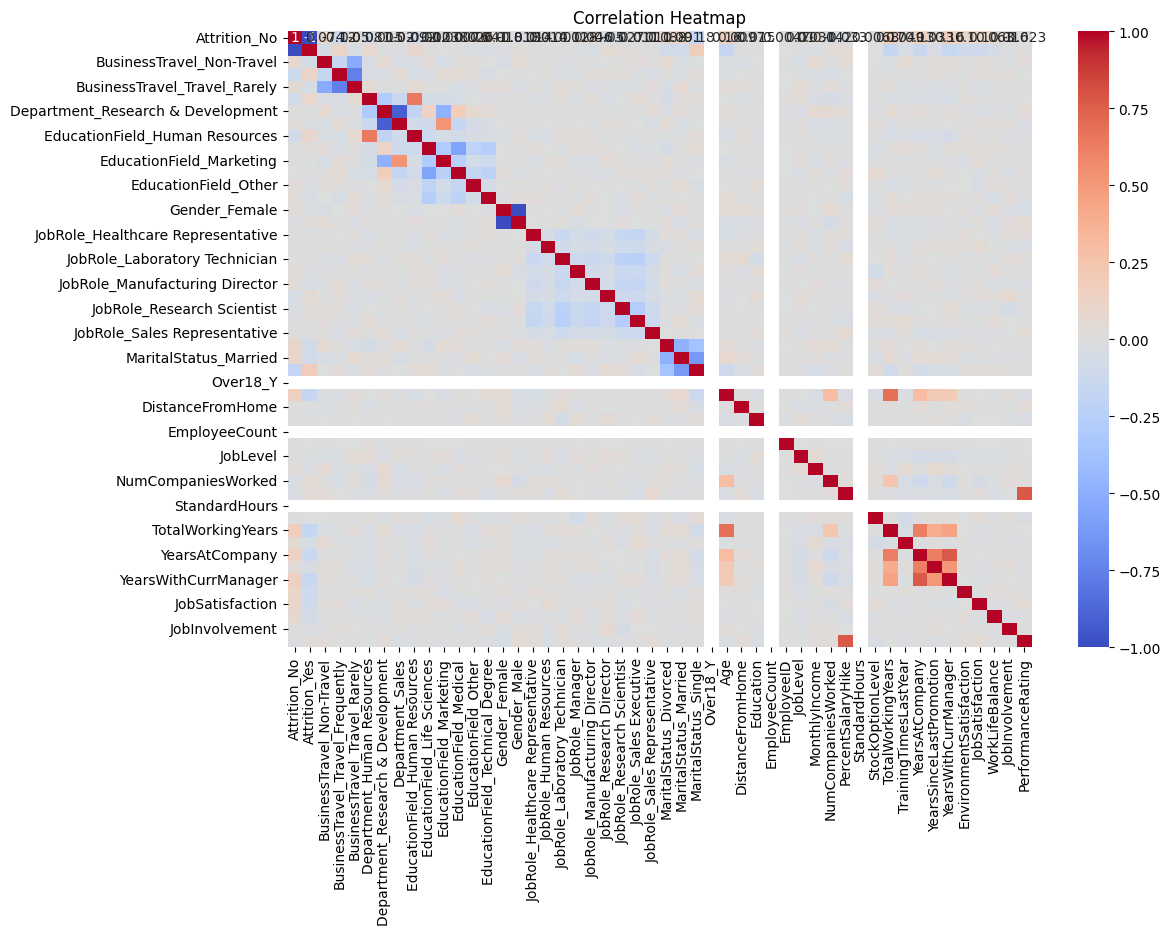

In [6]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
df_corr = df[numerical_columns].copy()
if 'Attrition' in df.columns:
    if df['Attrition'].dtype == 'object':
        df_corr['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    else:
        df_corr['Attrition'] = df['Attrition']

plt.figure(figsize=(2, 10))
sns.heatmap(df_corr.corr()[['Attrition']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Attrition')
plt.show()

KeyError: "None of [Index(['Attrition'], dtype='object')] are in the [columns]"

<Figure size 200x1000 with 0 Axes>